# Import Packages

In [6]:
# import sbol, matplotlib.pyplot, datatype, draw
import sbol, matplotlib.pyplot as plt
import draw, datatype as dt

# Rendering Const

In [7]:
# CONST
XMIN, XMAX = -50., 50.
YMIN, YMAX = -50., 50.

# Create SBOL Design

In [12]:
# create design 
design = dt.Design('demo')

# create three modules 
module1 = dt.Module(design, 'module1')
module1a = module1.add_module('module1a')
module1b = module1.add_module('module1b')
design.add_module(module1)

# module1a - parts & other part
part1p = dt.Part(module1a, 'p1p', 'Promoter')
part1c = dt.Part(module1a, 'p1c', 'CDS')
part1t = dt.Part(module1a, 'p1t', 'Terminator')
r1 = dt.Part(module1a, 'mrna1', 'RNA')
module1a.add_strand_part([part1p, part1c, part1t])
module1a.add_non_strand_part(r1)

# module1b - parts & other part
part2p = dt.Part(module1b, 'p2p', 'Promoter')
part2c = dt.Part(module1b, 'p2c', 'CDS')
part2t = dt.Part(module1b, 'p2t', 'Terminator')
r2 = dt.Part(module1b, 'mrna2', 'RNA')
module1b.add_strand_part([part2p, part2c, part2t])
module1b.add_non_strand_part(r2)

# module1 - other parts
rep1 = dt.Part(module1, 'rep1', 'Macromolecule')
rep2 = dt.Part(module1, 'rep2', 'Macromolecule')
module1.add_non_strand_part([rep1, rep2])

# add interaction 
design.add_interaction([
    dt.Interaction('process', r1.name, rep1.name),
    dt.Interaction('inhibition', rep1.name, part2p.name),
    dt.Interaction('process', r2.name, rep2.name),
    dt.Interaction('inhibition', rep2.name, part1p.name),
])

# Render Funcs

AttributeError: 'str' object has no attribute 'frame'

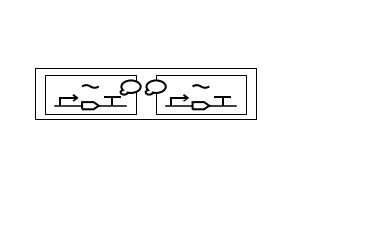

In [15]:
# set axis
fig, ax = plt.subplots()
ax.set_xlim(XMIN, XMAX)
ax.set_ylim(YMIN, YMAX)
ax.set_axis_off()

# draw modules and interactions
draw.draw_design(ax, design)

# don't forget plt.show()! 
plt.show()